<a href="https://colab.research.google.com/github/lcy042000/DeepLearning_TermProject/blob/main/DeepLearning_TermProject_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#수정한 컨볼루션 신경망
revisedModel = Sequential()
revisedModel.add(Conv2D(64, kernel_size=(5,5), input_shape=(28,28,1), activation='relu')) #kernel 수 64개로 증가, kernel_size (5, 5)로 변경
revisedModel.add(Conv2D(64, (3,3), activation='relu'))
revisedModel.add(MaxPooling2D(pool_size=(2,2)))
revisedModel.add(Dropout(0.35)) #Dropout 비율 35%로 증가
revisedModel.add(Flatten())
revisedModel.add(Dense(128, activation='relu'))
revisedModel.add(Dropout(0.5))
revisedModel.add(Dense(10, activation='softmax'))

In [ ]:
#모델의 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

revisedModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#모델 최적화 설정
modelpath = "./MNIST_CNN.hdf5"
modelpath2 = "./MNIST_CNN.hdf6"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)
checkpointer2 = ModelCheckpoint(filepath=modelpath2, monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)


Epoch 1: val_loss improved from inf to 0.05167, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.05167 to 0.04767, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.04767 to 0.04618, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss did not improve from 0.04618

Epoch 5: val_loss did not improve from 0.04618

Epoch 6: val_loss improved from 0.04618 to 0.04371, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.04371

Epoch 8: val_loss improved from 0.04371 to 0.04365, saving model to ./MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.04365 to 0.04243, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.04243

Epoch 11: val_loss did not improve from 0.04243

Epoch 12: val_loss improved from 0.04243 to 0.04025, saving model to ./MNIST_CNN.hdf5

Epoch 13: val_loss did not improve from 0.04025

Epoch 14: val_loss did not improve from 0.04025

Epoch 15: val_loss did not improve from 0.04025

Epoch 16: v


Epoch 2: val_loss improved from 0.07291 to 0.05865, saving model to ./MNIST_CNN.hdf6



Epoch 3: val_loss improved from 0.05865 to 0.04576, saving model to ./MNIST_CNN.hdf6



Epoch 4: val_loss did not improve from 0.04576

Epoch 5: val_loss improved from 0.04576 to 0.04390, saving model to ./MNIST_CNN.hdf6



Epoch 6: val_loss did not improve from 0.04390

Epoch 7: val_loss improved from 0.04390 to 0.04009, saving model to ./MNIST_CNN.hdf6



Epoch 8: val_loss improved from 0.04009 to 0.03933, saving model to ./MNIST_CNN.hdf6



Epoch 9: val_loss improved from 0.03933 to 0.03742, saving model to ./MNIST_CNN.hdf6



Epoch 10: val_loss did not improve from 0.03742

Epoch 11: val_loss did not improve from 0.03742

Epoch 12: val_loss did not improve from 0.03742

Epoch 13: val_loss did not improve from 0.03742

Epoch 14: val_loss improved from 0.03742 to 0.03701, saving model to ./MNIST_CNN.hdf6



Epoch 15: val_loss did not improve from 0.03701

Epoch 16: val_loss did not improve from 0.03701

Epoch 17: val_loss did not improve from 0.03701

Epoch 18: val_loss did not improve from 0.03701

Epoch 19: val_loss did not improve from 0.03701

Epoch 20: val_loss did not improve from 0.03701

Epoch 21: val_loss did not improve from 0.03701

Epoch 22: val_loss did not improve from 0.03701

Epoch 23: val_loss did not improve from 0.03701

Epoch 24: val_loss did not improve from 0.03701
313/313 [==============================] - 9s 28ms/step - loss: 0.0376 - accuracy: 0.9901

 model Test Accuracy: 0.9901
313/313 [==============================] - 11s 34ms/step - loss: 0.0236 - accuracy: 0.9934

 revisedModel Test Accuracy: 0.9934


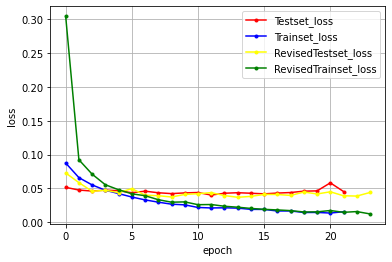

In [ ]:
#모델 실행
history=model.fit(X_train, y_train, validation_split=0.25, epochs=30,batch_size=200,verbose=0, callbacks=[early_stopping_callback,checkpointer])

revisedHistory = revisedModel.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer2])

#테스트 정확도 출력
print("\n model Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))
print("\n revisedModel Test Accuracy: %.4f" %(revisedModel.evaluate(X_test, y_test)[1]))

#검증셋과 학습셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

y_revisedVloss = revisedHistory.history['val_loss']
y_revisedLoss = revisedHistory.history['loss'] 

#그래프
x_len = np.arange(len(y_loss))
x_revisedLen = np.arange(len(y_revisedLoss))
plt.plot(x_len, y_vloss, marker='.', c='red',label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")
plt.plot(x_revisedLen, y_revisedVloss, marker='.', c='yellow',label='RevisedTestset_loss')
plt.plot(x_revisedLen, y_revisedLoss, marker='.', c='green', label="RevisedTrainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()